<a href="https://colab.research.google.com/github/kimiazargarzadeh/EC2B1_India/blob/main/Trend_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1) import modules

import numpy as np
import pandas as pd
import openpyxl

from get_regression_coefs_general import get_regression_coefs # import our function to get GDP trend
ghhjgfhg
# For plotting
import matplotlib.pyplot as plt
# import seaborn as sns # (not essential)
# sns.set_theme('talk', style = 'white')

ModuleNotFoundError: No module named 'get_regression_coefs_general'

In [ ]:
# 2.1) Load dataset
data = pd.read_excel('pwt100.xlsx', sheet_name = 'Data', header = 0, engine='openpyxl')

# 2.2) Clean data
# Subseting relevant columns and compute per capita real GDP
data = data.loc[:, ("country", "year", "rgdpe", "pop")]
data["rgdpe_pc"] = data["rgdpe"] / data["pop"]

# select our country (India)
data = data.loc[data["country"] == "India", ("year", "rgdpe_pc")]
# Reset the index (not crucial)
data = data.reset_index(drop = True)

# Subset the RGDP per capita series
ymax = 2019
ymin = 1950
# We use logical indexing to subset the data to rows of years ymin <= year <= ymax
Y = data.loc[np.logical_and(data["year"] <= ymax, data["year"] >= ymin), "rgdpe_pc"]
y = np.log(Y)
data = data[data["year"] >= ymin] # we keep only years after ymin

# Compute separate sample sizes for the subsample used for estimation and the whole sample.
T = len(Y) # sample size used for regression
T_all = data["year"].max() - (ymin - 1) # number of all years in the data after ymin

Text(0.5, 1.0, 'Linear Additive: GDP & trend')

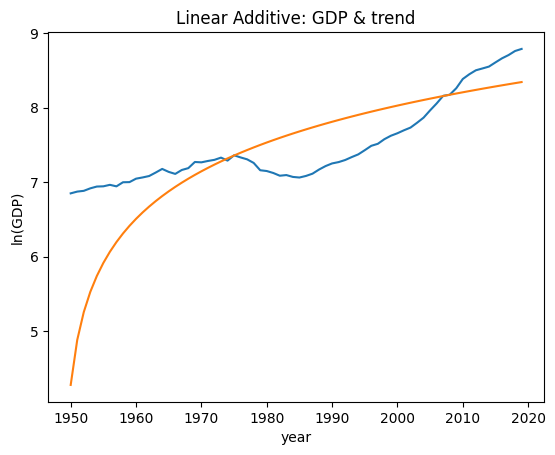

In [ ]:
# 3.1) Additive Linear Model
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# The dependent variable is per capita GDP in *levels*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 # recall that Python starts indexing at 0

a_add_lin, b_add_lin = get_regression_coefs(Y, x1, x2)

# Initialise predicted values yhat
Yhat_add_lin = np.empty(T_all)

# Create loop to compute trend for all years
for t in range(T_all):
    Yhat_add_lin[t] = a_add_lin + b_add_lin * (t + 1) # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_lin = np.log(Yhat_add_lin)

lw = 4

# since this program has only calculated one of the four trends, it can only plot one. But you have to think carefully
# on how to present the results when you have calculated all four

plt.figure()
#one could add options such as a particular size and use instead
#plt.figure(figsize=(7, 5))
plt.plot(data['year'],np.log(data['rgdpe_pc']))
plt.plot(data['year'],yhat_add_lin)

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Linear Additive: GDP & trend")

Text(0.5, 1.0, 'Additive Quadratic Model: GDP & Trend')

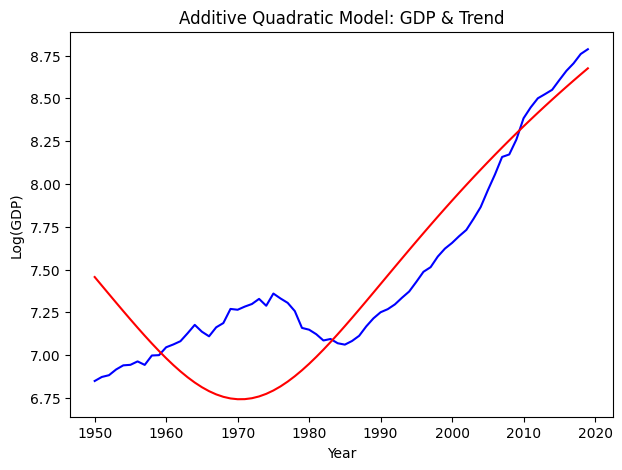

In [ ]:
# 3.2) Additive Quadratic Model
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# Third regressor x3 is the vector 1^2, 2^2, ..., T^2
x1 = np.empty(T)  # Initialize an empty vector for the first regressor (ones)
x2 = np.empty(T)  # Initialize an empty vector for the second regressor (t)
x3 = np.empty(T)  # Initialize an empty vector for the third regressor (t^2)

for t in range(T):
    x1[t] = 1.  # Vector of ones (intercept)
    x2[t] = t + 1  # Time variable (1, 2, ..., T)
    x3[t] = (t + 1) ** 2  # Time squared variable (1^2, 2^2, ..., T^2)

# Run the regression for the additive quadratic model (GDP ~ t + t^2)
a_add_quad, b_add_quad_t, b_add_quad_t2 = get_regression_coefs(Y, x1, x2, x3)

# Initialize predicted values yhat
Yhat_add_quad = np.empty(T_all)

# Compute the predicted trend for all years
for t in range(T_all):
    Yhat_add_quad[t] = a_add_quad + b_add_quad_t * (t + 1) + b_add_quad_t2 * (t + 1)**2

# Let us convert the trend into log-units
yhat_add_quad = np.log(Yhat_add_quad)

# Plot the actual data and the predicted trend
plt.figure(figsize=(7, 5))
plt.plot(data['year'], np.log(data['rgdpe_pc']), label="Log(GDP) Actual", color='blue')
plt.plot(data['year'], yhat_add_quad, label="Log(GDP) Trend (Additive Quadratic)", color='red')

# Labels
plt.xlabel("Year")
plt.ylabel("Log(GDP)")

# Title
plt.title("Additive Quadratic Model: GDP & Trend")